In [1]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV


In [2]:
data_path = "KOA_Dataset_optionA.csv"

df = pd.read_csv(data_path)
print("Shape:", df.shape)
df.head()

Shape: (1000, 35)


,Timestamp,Column 1,Patient Identification Number,age,gender,height,weight,occupation,physical_activity_level,living_environment,...,cs,cholesterol,crp,esr,rf,fbc,What is the current severity level of the patient’s knee osteoarthritis ?,Does the patient have any other health conditions or risk factors that may contribute to knee osteoarthritis?,What are the suggested or ongoing treatments for the patient’s current condition?,KOA
0,29/10/2025 10:10:17,NaN,Gk 245/22,51,Male,1.66,73.9,Yes,Low,Urban,...,8.85,NaN,2.99,NaN,13.9,12.7,Grade 1 (Doubtful),"Family history of osteoarthritis, Sedentary or...","1 = Physiotherapy, 2 = Medication",No
1,25/11/2025 08:58:16,NaN,Us 1750/25,56,Female,1.57,73.3,Yes,Moderate,Urban,...,8.99,165.0,NaN,41.0,0.0,NaN,Grade 3 (Moderate),"Hypertension - High Blood Pressure, Vitamin D ...",NaN,Yes
2,19/11/2025 09:35:04,NaN,Gk 2227/25,44,Female,1.58,55.7,Yes,Moderate,Urban,...,9.35,220.0,2.86,NaN,27.7,NaN,Grade 3 (Moderate),"Obesity or overweight, Hypertension - High Blo...","0 = Lifestyle modification, 1 = Physiotherapy,...",No
3,19/11/2025 10:07:43,NaN,JR 4768/16,72,Female,1.66,46.3,No,Low,Rural,...,9.45,227.0,2.26,NaN,13.1,14.1,Grade 1 (Doubtful),Family history of osteoarthritis,0 = Lifestyle modification,No
4,19/11/2025 10:07:43,NaN,Us 2186/22,47,Male,1.66,80.6,Yes,Moderate,Rural,...,9.09,NaN,2.88,33.0,NaN,12.7,Grade 2 (Mild),None of the above,"0 = Lifestyle modification, 1 = Physiotherapy,...",No


In [3]:
#checking the total number of duplicate columns

df.duplicated().sum()

0

In [4]:
# List of columns that want to remove

columns_to_remove = [
    "Timestamp",
    "Column 1",
    "Patient Identification Number",
    "What is the current severity level of the patient’s knee osteoarthritis ?",
    "Does the patient have any other health conditions or risk factors that may contribute to knee osteoarthritis? ",
    "What are the suggested or ongoing treatments for the patient’s current condition?"
]

# Only drop columns that actually exist in df
columns_to_drop = [c for c in columns_to_remove if c in df.columns]

df = df.drop(columns=columns_to_drop)

print("Dropped columns:", columns_to_drop)
print("New shape:", df.shape)
df.head()

Dropped columns: ['Timestamp', 'Column 1', 'Patient Identification Number', 'What is the current severity level of the patient’s knee osteoarthritis ?', 'Does the patient have any other health conditions or risk factors that may contribute to knee osteoarthritis? ', 'What are the suggested or ongoing treatments for the patient’s current condition?']
New shape: (1000, 29)


,age,gender,height,weight,occupation,physical_activity_level,living_environment,knee_pain,knee_pain_in_past_week,stifness_after_resting,...,fbs,wbc,platelets,cs,cholesterol,crp,esr,rf,fbc,KOA
0,51,Male,1.66,73.9,Yes,Low,Urban,No,1,always,...,78.2,NaN,288.0,8.85,NaN,2.99,NaN,13.9,12.7,No
1,56,Female,1.57,73.3,Yes,Moderate,Urban,Yes,3,occasionally,...,70.0,6.69,296.0,8.99,165.0,NaN,41.0,0.0,NaN,Yes
2,44,Female,1.58,55.7,Yes,Moderate,Urban,Yes,1,never,...,84.8,9.28,200.0,9.35,220.0,2.86,NaN,27.7,NaN,No
3,72,Female,1.66,46.3,No,Low,Rural,No,1,never,...,100.4,3.97,NaN,9.45,227.0,2.26,NaN,13.1,14.1,No
4,47,Male,1.66,80.6,Yes,Moderate,Rural,No,1,frequently,...,74.9,6.83,NaN,9.09,NaN,2.88,33.0,NaN,12.7,No


In [5]:
#performing EDA

df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1000 non-null   int64  
 1   gender                    1000 non-null   object 
 2   height                    1000 non-null   float64
 3   weight                    1000 non-null   float64
 4   occupation                1000 non-null   object 
 5   physical_activity_level   1000 non-null   object 
 6   living_environment        1000 non-null   object 
 7   knee_pain                 1000 non-null   object 
 8   knee_pain_in_past_week    1000 non-null   int64  
 9   stifness_after_resting    1000 non-null   object 
 10  knee_injuries             1000 non-null   object 
 11  swelling                  1000 non-null   object 
 12  difficulty_in_performing  608 non-null    object 
 13  family_history            1000 non-null   object 
 14  obesity  

,age,gender,height,weight,occupation,physical_activity_level,living_environment,knee_pain,knee_pain_in_past_week,stifness_after_resting,...,fbs,wbc,platelets,cs,cholesterol,crp,esr,rf,fbc,KOA
count,1000.000000,1000,1000.000000,1000.00000,1000,1000,1000,1000,1000.000000,1000,...,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,1000
unique,NaN,2,NaN,NaN,2,3,2,2,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Female,NaN,NaN,Yes,Moderate,Urban,Yes,NaN,frequently,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
freq,NaN,559,NaN,NaN,649,464,691,685,NaN,320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,608
mean,53.189000,NaN,1.601150,74.13100,NaN,NaN,NaN,NaN,2.621000,NaN,...,106.940909,7.491545,296.266234,9.146662,205.037662,5.764234,28.246753,18.299221,12.941948,NaN
std,11.581771,NaN,0.079752,11.90247,NaN,NaN,NaN,NaN,1.383211,NaN,...,22.257820,1.406370,55.517150,0.346341,32.656304,3.098250,12.961838,11.278446,1.055652,NaN
min,20.000000,NaN,1.450000,45.00000,NaN,NaN,NaN,NaN,0.000000,NaN,...,70.000000,3.900000,150.000000,8.200000,130.000000,0.200000,2.000000,0.000000,10.000000,NaN
25%,46.000000,NaN,1.547500,66.37500,NaN,NaN,NaN,NaN,2.000000,NaN,...,90.850000,6.540000,258.000000,8.920000,183.000000,3.337500,19.000000,9.900000,12.200000,NaN
50%,54.000000,NaN,1.600000,74.05000,NaN,NaN,NaN,NaN,3.000000,NaN,...,104.200000,7.470000,295.000000,9.130000,205.000000,5.520000,29.000000,17.550000,13.000000,NaN
75%,61.000000,NaN,1.660000,81.82500,NaN,NaN,NaN,NaN,4.000000,NaN,...,122.600000,8.457500,333.000000,9.380000,225.000000,7.912500,38.000000,25.650000,13.675000,NaN


In [6]:
#check for missing values

df.isna().sum().sort_values(ascending=False)

difficulty_in_performing    392
fbc                         230
rf                          230
esr                         230
crp                         230
cholesterol                 230
cs                          230
platelets                   230
wbc                         230
fbs                         230
age                           0
diabetes                      0
rheumatoid_arthritis          0
vitaminD_deficiency           0
hypertension                  0
obesity                       0
gender                        0
family_history                0
swelling                      0
knee_injuries                 0
stifness_after_resting        0
knee_pain_in_past_week        0
knee_pain                     0
living_environment            0
physical_activity_level       0
occupation                    0
weight                        0
height                        0
KOA                           0
dtype: int64

In [7]:
#view all columns

df.columns.tolist()

['age',
 'gender',
 'height',
 'weight',
 'occupation',
 'physical_activity_level',
 'living_environment',
 'knee_pain',
 'knee_pain_in_past_week',
 'stifness_after_resting',
 'knee_injuries',
 'swelling',
 'difficulty_in_performing',
 'family_history',
 'obesity',
 'diabetes',
 'hypertension',
 'vitaminD_deficiency',
 'rheumatoid_arthritis',
 'fbs',
 'wbc',
 'platelets',
 'cs',
 'cholesterol',
 'crp',
 'esr',
 'rf',
 'fbc',
 'KOA']

In [8]:
#handling missing values in categorical columns

df['difficulty_in_performing'] = df['difficulty_in_performing'].fillna(df['difficulty_in_performing'].mode()[0])

In [9]:
#handling missing values in numerical columns

def clean_numeric(col):
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace("mm", "", regex=False)
    df[col] = df[col].str.replace("MM", "", regex=False)
    df[col] = df[col].str.replace(" ", "", regex=False)
    df[col] = df[col].str.replace("\u200b", "", regex=False)  # zero-width space
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Clean and fill FBC
clean_numeric('fbc')
df['fbc'] = df['fbc'].fillna(df['fbc'].median())

# CRP
clean_numeric('crp')
df['crp'] = df['crp'].fillna(df['crp'].median())

# CS (Calcium Serum)
clean_numeric('cs')
df['cs'] = df['cs'].fillna(df['cs'].median())

# ESR
clean_numeric('esr')
df['esr'] = df['esr'].fillna(df['esr'].median())

# WBC
clean_numeric('wbc')
df['wbc'] = df['wbc'].fillna(df['wbc'].median())

# RF
clean_numeric('rf')
df['rf'] = df['rf'].fillna(df['rf'].median())

# Cholesterol
clean_numeric('cholesterol')
df['cholesterol'] = df['cholesterol'].fillna(df['cholesterol'].median())

# FBS
clean_numeric('fbs')
df['fbs'] = df['fbs'].fillna(df['fbs'].median())

#platelets
clean_numeric('platelets')
df['platelets'] = df['platelets'].fillna(df['platelets'].median())

In [10]:
#check for missing values after filling the missing values

df.isna().sum().sort_values(ascending=False)

age                         0
diabetes                    0
fbc                         0
rf                          0
esr                         0
crp                         0
cholesterol                 0
cs                          0
platelets                   0
wbc                         0
fbs                         0
rheumatoid_arthritis        0
vitaminD_deficiency         0
hypertension                0
obesity                     0
gender                      0
family_history              0
difficulty_in_performing    0
swelling                    0
knee_injuries               0
stifness_after_resting      0
knee_pain_in_past_week      0
knee_pain                   0
living_environment          0
physical_activity_level     0
occupation                  0
weight                      0
height                      0
KOA                         0
dtype: int64

In [11]:
df.dtypes

age                           int64
gender                       object
height                      float64
weight                      float64
occupation                   object
physical_activity_level      object
living_environment           object
knee_pain                    object
knee_pain_in_past_week        int64
stifness_after_resting       object
knee_injuries                object
swelling                     object
difficulty_in_performing     object
family_history               object
obesity                      object
diabetes                     object
hypertension                 object
vitaminD_deficiency          object
rheumatoid_arthritis         object
fbs                         float64
wbc                         float64
platelets                   float64
cs                          float64
cholesterol                 float64
crp                         float64
esr                         float64
rf                          float64
fbc                         

In [12]:
#encoding the dependent variable

df = df.rename(columns={'KOA ': 'KOA'})
df['KOA'] = df['KOA'].map({'Yes': 1, 'No': 0})

In [13]:
#Label encoding for binary columns

le = LabelEncoder()

binary_cols = [
    'gender',
    'occupation',
    'living_environment',
    'knee_pain',
    'stifness_after_resting',
    'knee_injuries',
    'swelling',
    'difficulty_in_performing',
    'family_history',
    'obesity',
    'diabetes',
    'hypertension',
    'vitaminD_deficiency',
    'rheumatoid_arthritis'
]

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

In [14]:
df.head()

,age,gender,height,weight,occupation,physical_activity_level,living_environment,knee_pain,knee_pain_in_past_week,stifness_after_resting,...,fbs,wbc,platelets,cs,cholesterol,crp,esr,rf,fbc,KOA
0,51,1,1.66,73.9,1,Low,1,0,1,0,...,78.2,7.47,288.0,8.85,205.0,2.99,29.0,13.90,12.7,0
1,56,0,1.57,73.3,1,Moderate,1,1,3,3,...,70.0,6.69,296.0,8.99,165.0,5.52,41.0,0.00,13.0,1
2,44,0,1.58,55.7,1,Moderate,1,1,1,2,...,84.8,9.28,200.0,9.35,220.0,2.86,29.0,27.70,13.0,0
3,72,0,1.66,46.3,0,Low,0,0,1,2,...,100.4,3.97,295.0,9.45,227.0,2.26,29.0,13.10,14.1,0
4,47,1,1.66,80.6,1,Moderate,0,0,1,1,...,74.9,6.83,295.0,9.09,205.0,2.88,33.0,17.55,12.7,0


In [15]:
#One-Hot encoding for multi class columns

multi_cols = [
    'physical_activity_level'
    ]

df = pd.get_dummies(df, columns=multi_cols, drop_first=True)

In [16]:
# Quick check

print(df.dtypes.value_counts())
print("Final shape:", df.shape)

int32      14
float64    11
int64       3
bool        2
Name: count, dtype: int64
Final shape: (1000, 30)


In [17]:
df.head()

,age,gender,height,weight,occupation,living_environment,knee_pain,knee_pain_in_past_week,stifness_after_resting,knee_injuries,...,platelets,cs,cholesterol,crp,esr,rf,fbc,KOA,physical_activity_level_Low,physical_activity_level_Moderate
0,51,1,1.66,73.9,1,1,0,1,0,0,...,288.0,8.85,205.0,2.99,29.0,13.90,12.7,0,True,False
1,56,0,1.57,73.3,1,1,1,3,3,0,...,296.0,8.99,165.0,5.52,41.0,0.00,13.0,1,False,True
2,44,0,1.58,55.7,1,1,1,1,2,0,...,200.0,9.35,220.0,2.86,29.0,27.70,13.0,0,False,True
3,72,0,1.66,46.3,0,0,0,1,2,1,...,295.0,9.45,227.0,2.26,29.0,13.10,14.1,0,True,False
4,47,1,1.66,80.6,1,0,0,1,1,0,...,295.0,9.09,205.0,2.88,33.0,17.55,12.7,0,False,True


In [18]:
#calculate BMI using height and weight column

df['BMI'] = df['weight'] / (df['height'] ** 2)

In [19]:
df.columns.tolist()

['age',
 'gender',
 'height',
 'weight',
 'occupation',
 'living_environment',
 'knee_pain',
 'knee_pain_in_past_week',
 'stifness_after_resting',
 'knee_injuries',
 'swelling',
 'difficulty_in_performing',
 'family_history',
 'obesity',
 'diabetes',
 'hypertension',
 'vitaminD_deficiency',
 'rheumatoid_arthritis',
 'fbs',
 'wbc',
 'platelets',
 'cs',
 'cholesterol',
 'crp',
 'esr',
 'rf',
 'fbc',
 'KOA',
 'physical_activity_level_Low',
 'physical_activity_level_Moderate',
 'BMI']

In [20]:
#seperate x, y

X = df.drop('KOA', axis=1)
y = df['KOA']

print("\nFeature matrix shape:", X.shape)
print("Target distribution:\n", y.value_counts())


Feature matrix shape: (1000, 30)
Target distribution:
 KOA
1    608
0    392
Name: count, dtype: int64


In [21]:
#split the dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

print("\nTrain shape:", X_train.shape, " Test shape:", X_test.shape)


Train shape: (800, 30)  Test shape: (200, 30)


In [22]:
#Handling class imbalance

sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

print("After SMOTE:", X_train.shape, "label counts:", y_train.value_counts())

After SMOTE: (972, 30) label counts: KOA
0    486
1    486
Name: count, dtype: int64


In [23]:
#standardize numeric columns

numeric_cols = [
    'age', 'height', 'weight',
    'knee_pain_in_past_week',
    'fbs', 'wbc', 'platelets', 'cs',
    'cholesterol', 'crp', 'esr', 'rf', 'fbc', 'BMI'
]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [24]:
X.head()

,age,gender,height,weight,occupation,living_environment,knee_pain,knee_pain_in_past_week,stifness_after_resting,knee_injuries,...,platelets,cs,cholesterol,crp,esr,rf,fbc,physical_activity_level_Low,physical_activity_level_Moderate,BMI
0,51,1,1.66,73.9,1,1,0,1,0,0,...,288.0,8.85,205.0,2.99,29.0,13.90,12.7,True,False,26.818116
1,56,0,1.57,73.3,1,1,1,3,3,0,...,296.0,8.99,165.0,5.52,41.0,0.00,13.0,False,True,29.737515
2,44,0,1.58,55.7,1,1,1,1,2,0,...,200.0,9.35,220.0,2.86,29.0,27.70,13.0,False,True,22.312129
3,72,0,1.66,46.3,0,0,0,1,2,1,...,295.0,9.45,227.0,2.26,29.0,13.10,14.1,True,False,16.802148
4,47,1,1.66,80.6,1,0,0,1,1,0,...,295.0,9.09,205.0,2.88,33.0,17.55,12.7,False,True,29.249528


In [25]:
#train models

try:
    from xgboost import XGBClassifier
    xgb_available = True
except ImportError:
    xgb_available = False
    print("XGBoost not installed – skipping XGBClassifier.")


In [26]:
#define models

models = {
    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        max_depth=15,
        random_state=42,
        n_jobs=-1
    ),
    "LogisticRegression": LogisticRegression(
        max_iter=1000,
        solver='lbfgs'
    ),
    "KNN_5": KNeighborsClassifier(
        n_neighbors=5
    ),
    "GradientBoosting": GradientBoostingClassifier(
        random_state=42
    )
}

# Optionally add XGBoost if available
if xgb_available:
    models["XGBoost"] = XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        eval_metric='logloss'
    )

In [27]:
#train and evaluate models

results = []

for name, clf in models.items():
    print(f"\n================= {name} =================")
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print("Accuracy:", acc)
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    results.append((name, acc))

# Summary table
print("\n\n====== MODEL ACCURACY SUMMARY ======")
for name, acc in sorted(results, key=lambda x: x[1], reverse=True):
    print(f"{name:20s}: {acc:.4f}")



================= RandomForest =================
Accuracy: 0.925

Confusion Matrix:
[[ 69   9]
 [  6 116]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90        78
           1       0.93      0.95      0.94       122

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.93      0.92       200


================= LogisticRegression =================
Accuracy: 0.93

Confusion Matrix:
[[ 71   7]
 [  7 115]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        78
           1       0.94      0.94      0.94       122

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200


================= KNN_5 =================
Accuracy: 0.92

Confusion Matrix:


In [28]:
#hyper paramater tuning - random forest

rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1,
    class_weight='balanced'
)

param_dist_rf = {
    "n_estimators": [200, 300, 500, 700],
    "max_depth": [None, 5, 10, 15, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", 0.5],
    "bootstrap": [True, False]
}

rf_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=30,                 # number of random combinations
    scoring="accuracy",
    cv=5,                      # 5-fold cross validation
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_search.fit(X_train, y_train)

print("\nBest RF params:", rf_search.best_params_)
print("Best RF CV accuracy:", rf_search.best_score_)

best_rf = rf_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)
print("\n=== Tuned Random Forest on Test Set ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best RF params: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}
Best RF CV accuracy: 0.9609199048374306

=== Tuned Random Forest on Test Set ===
Accuracy: 0.925
Confusion Matrix:
 [[ 69   9]
 [  6 116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90        78
           1       0.93      0.95      0.94       122

    accuracy                           0.93       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.93      0.92       200



In [29]:
# 2. Gradient Boosting - tuning

gb = GradientBoostingClassifier(random_state=42)

param_dist_gb = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [2, 3, 4],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.7, 0.85, 1.0]
}

gb_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist_gb,
    n_iter=25,
    scoring="accuracy",
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

gb_search.fit(X_train, y_train)

print("\nBest GB params:", gb_search.best_params_)
print("Best GB CV accuracy:", gb_search.best_score_)

best_gb = gb_search.best_estimator_

y_pred_gb = best_gb.predict(X_test)
print("\n=== Tuned Gradient Boosting on Test Set ===")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Fitting 5 folds for each of 25 candidates, totalling 125 fits

Best GB params: {'subsample': 0.7, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 2, 'learning_rate': 0.05}
Best GB CV accuracy: 0.967084324610098

=== Tuned Gradient Boosting on Test Set ===
Accuracy: 0.955
Confusion Matrix:
 [[ 73   5]
 [  4 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94        78
           1       0.96      0.97      0.96       122

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [30]:
# 3. XGBoost - tuning (if available)

if xgb_available:
    xgb = XGBClassifier(
        random_state=42,
        n_estimators=300,
        eval_metric="logloss",
        use_label_encoder=False
    )

    param_dist_xgb = {
        "n_estimators": [300, 500, 700],
        "learning_rate": [0.01, 0.03, 0.05, 0.1],
        "max_depth": [3, 4, 5, 6],
        "subsample": [0.7, 0.85, 1.0],
        "colsample_bytree": [0.7, 0.85, 1.0],
        "min_child_weight": [1, 3, 5],
        "gamma": [0.0, 0.1, 0.2]
    }

    xgb_search = RandomizedSearchCV(
        estimator=xgb,
        param_distributions=param_dist_xgb,
        n_iter=30,
        scoring="accuracy",
        cv=5,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )

    xgb_search.fit(X_train, y_train)

    print("\nBest XGB params:", xgb_search.best_params_)
    print("Best XGB CV accuracy:", xgb_search.best_score_)

    best_xgb = xgb_search.best_estimator_

    y_pred_xgb = best_xgb.predict(X_test)
    print("\n=== Tuned XGBoost on Test Set ===")
    print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
    print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
else:
    print("\nSkipping XGBoost tuning because xgboost is not installed.")


Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\Users\msi\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [15:40:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best XGB params: {'subsample': 0.7, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best XGB CV accuracy: 0.9660586835844567

=== Tuned XGBoost on Test Set ===
Accuracy: 0.95
Confusion Matrix:
 [[ 75   3]
 [  7 115]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94        78
           1       0.97      0.94      0.96       122

    accuracy                           0.95       200
   macro avg       0.94      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [31]:
print("\n=== RF Train vs Test Accuracy ===")
print("Train:", accuracy_score(y_train, best_rf.predict(X_train)))
print("Test :", accuracy_score(y_test, best_rf.predict(X_test)))

print("\n=== GB Train vs Test Accuracy ===")
print("Train:", accuracy_score(y_train, best_gb.predict(X_train)))
print("Test :", accuracy_score(y_test, best_gb.predict(X_test)))

print("\n=== XGB Train vs Test Accuracy ===")
print("Train:", accuracy_score(y_train, best_xgb.predict(X_train)))
print("Test :", accuracy_score(y_test, best_xgb.predict(X_test)))


=== RF Train vs Test Accuracy ===
Train: 1.0
Test : 0.925

=== GB Train vs Test Accuracy ===
Train: 0.9969135802469136
Test : 0.955

=== XGB Train vs Test Accuracy ===
Train: 0.9979423868312757
Test : 0.95


In [32]:
import joblib
from sklearn.metrics import accuracy_score

models = {
    "RF": best_rf,
    "GB": best_gb,
    "XGB": best_xgb
}

best_model_name = None
best_accuracy = 0

for name, model in models.items():
    acc = accuracy_score(y_test, model.predict(X_test))
    if acc > best_accuracy:
        best_accuracy = acc
        best_model_name = name
        best_model = model

print(f"Best Model: {best_model_name}")
print(f"Best Test Accuracy: {best_accuracy}")

joblib.dump(best_model, "best_model.pkl")


Best Model: GB
Best Test Accuracy: 0.955


['best_model.pkl']

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import joblib

pipeline = Pipeline([
    ("scaler", scaler),
    ("model", best_model)
])

joblib.dump(pipeline, "koa_best_model.pkl")

['koa_best_model.pkl']

In [34]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

# Use your best model (GB)
model = best_gb

# Permutation importance on TEST set
perm = permutation_importance(
    model, X_test, y_test,
    n_repeats=30,
    random_state=42,
    scoring="accuracy",
    n_jobs=-1
)

importance_df = pd.DataFrame({
    "feature": X_test.columns,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std
}).sort_values("importance_mean", ascending=False)

print("Test Accuracy:", accuracy_score(y_test, model.predict(X_test)))
print("\nTop 15 important features (Permutation Importance):")
print(importance_df.head())


Test Accuracy: 0.955

Top 15 important features (Permutation Importance):
                   feature  importance_mean  importance_std
7   knee_pain_in_past_week         0.076000        0.018726
8   stifness_after_resting         0.037167        0.009100
23                     crp         0.035333        0.011025
0                      age         0.021000        0.010755
10                swelling         0.014167        0.006203


In [35]:
import pandas as pd
import numpy as np

gb_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": best_gb.feature_importances_
}).sort_values("importance", ascending=False)

print("Top 15 GB feature_importances_:")
print(gb_importance.head(15))


Top 15 GB feature_importances_:
                     feature  importance
7     knee_pain_in_past_week    0.285487
6                  knee_pain    0.277516
0                        age    0.112829
23                       crp    0.097165
8     stifness_after_resting    0.051956
3                     weight    0.036852
10                  swelling    0.035779
29                       BMI    0.017126
24                       esr    0.017073
21                        cs    0.012865
18                       fbs    0.012552
25                        rf    0.012445
22               cholesterol    0.006338
11  difficulty_in_performing    0.004684
15              hypertension    0.004203


Top 15 features by SHAP:
                     feature  mean_abs_shap
7     knee_pain_in_past_week       1.660320
6                  knee_pain       1.037379
8     stifness_after_resting       0.887932
23                       crp       0.854679
0                        age       0.844436
3                     weight       0.653339
10                  swelling       0.542712
15              hypertension       0.411892
21                        cs       0.404046
24                       esr       0.393955
25                        rf       0.317496
22               cholesterol       0.305921
19                       wbc       0.288965
11  difficulty_in_performing       0.259208
9              knee_injuries       0.255639


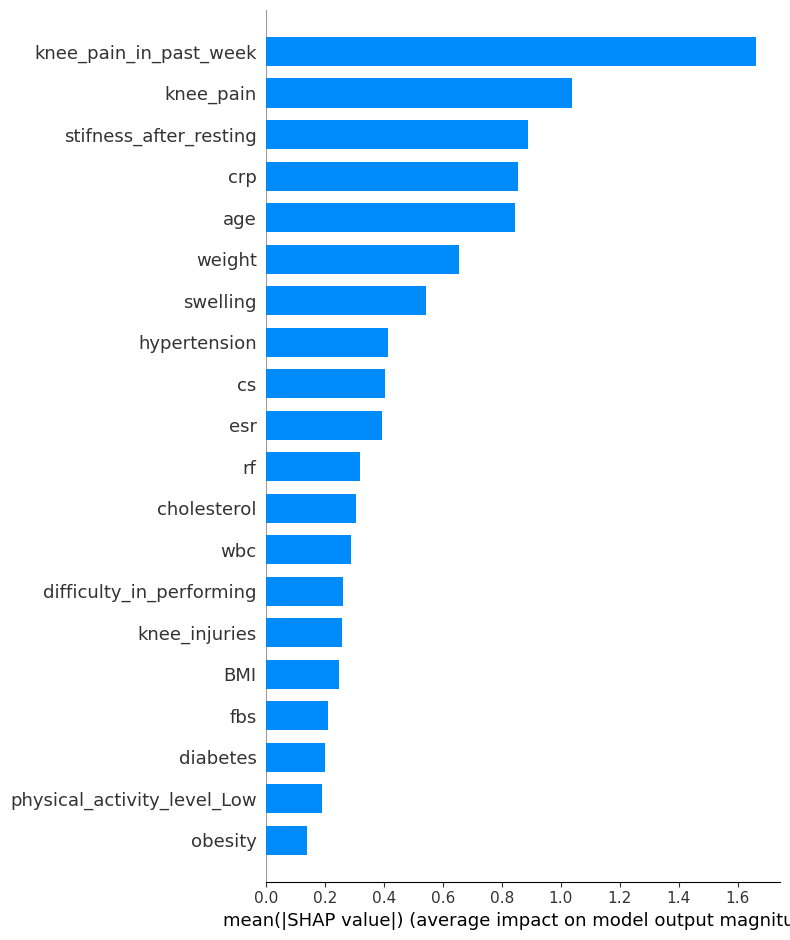

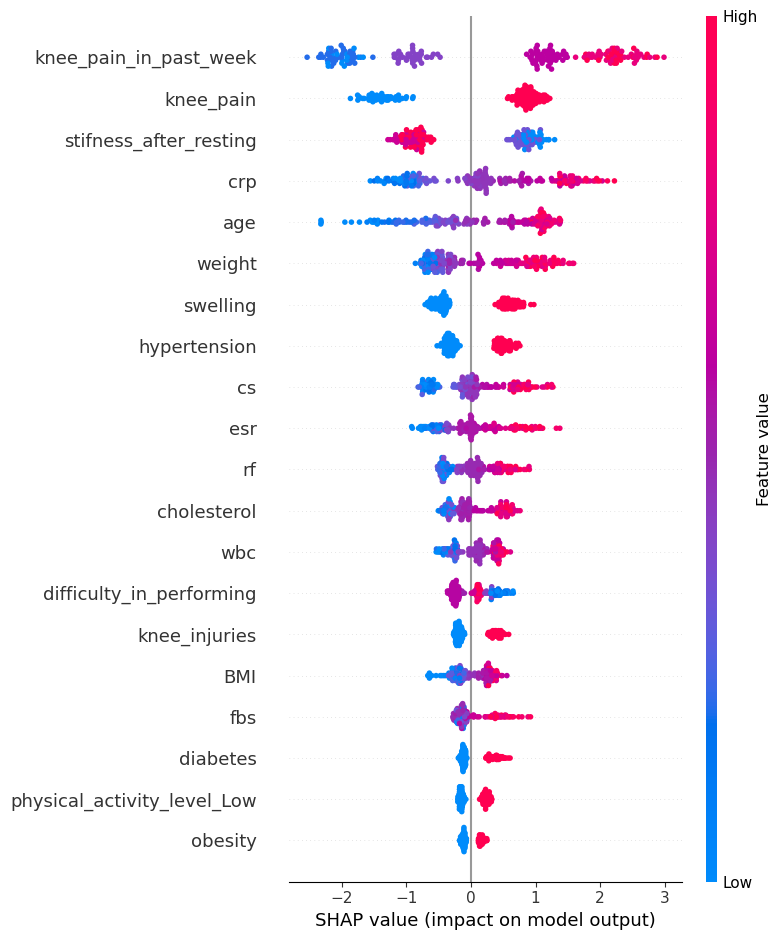

In [36]:
# pip install shap
import shap
import numpy as np
import pandas as pd

# use XGB model for SHAP if available
model = best_xgb

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Global importance (mean absolute SHAP value)
global_importance = pd.DataFrame({
    "feature": X_test.columns,
    "mean_abs_shap": np.abs(shap_values).mean(axis=0)
}).sort_values("mean_abs_shap", ascending=False)

print("Top 15 features by SHAP:")
print(global_importance.head(15))

# Plot (optional)
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)  # detailed


In [37]:
import json
import joblib
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline


# =========================
# 1) LOAD
# =========================
data_path = "KOA_Dataset_optionA.csv"
df = pd.read_csv(data_path)

# =========================
# 2) DROP UNWANTED COLUMNS (same as yours)
# =========================
columns_to_remove = [
    "Timestamp",
    "Column 1",
    "Patient Identification Number",
    "What is the current severity level of the patient’s knee osteoarthritis ?",
    "Does the patient have any other health conditions or risk factors that may contribute to knee osteoarthritis? ",
    "What are the suggested or ongoing treatments for the patient’s current condition?"
]
columns_to_drop = [c for c in columns_to_remove if c in df.columns]
df = df.drop(columns=columns_to_drop)

# =========================
# 3) HANDLE MISSING VALUES (same idea)
# =========================
# categorical
if "difficulty_in_performing" in df.columns:
    df["difficulty_in_performing"] = df["difficulty_in_performing"].fillna(df["difficulty_in_performing"].mode()[0])

def clean_numeric(col):
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace("mm", "", regex=False)
    df[col] = df[col].str.replace("MM", "", regex=False)
    df[col] = df[col].str.replace(" ", "", regex=False)
    df[col] = df[col].str.replace("\u200b", "", regex=False)
    df[col] = pd.to_numeric(df[col], errors="coerce")

num_fill_cols = ["fbc","crp","cs","esr","wbc","rf","cholesterol","fbs","platelets"]
for c in num_fill_cols:
    if c in df.columns:
        clean_numeric(c)
        df[c] = df[c].fillna(df[c].median())

# =========================
# 4) TARGET ENCODING (KOA -> 1/0)
# =========================
df = df.rename(columns={"KOA ": "KOA"})
df["KOA"] = df["KOA"].map({"Yes": 1, "No": 0})

# =========================
# 5) LABEL ENCODE CATEGORICAL (same as you did)
# =========================
le = LabelEncoder()
cat_cols = [
    "gender","occupation","living_environment","knee_pain","stifness_after_resting",
    "knee_injuries","swelling","difficulty_in_performing","family_history","obesity",
    "diabetes","hypertension","vitaminD_deficiency","rheumatoid_arthritis"
]
for c in cat_cols:
    if c in df.columns:
        df[c] = le.fit_transform(df[c])

# =========================
# 6) ONE-HOT for physical_activity_level (drop_first=True)
# =========================
if "physical_activity_level" in df.columns:
    df = pd.get_dummies(df, columns=["physical_activity_level"], drop_first=True)

# =========================
# 7) BMI
# =========================
df["BMI"] = df["weight"] / (df["height"] ** 2)

# =========================
# 8) SPLIT X / y
# =========================
X = df.drop("KOA", axis=1)
y = df["KOA"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =========================
# 9) PREPROCESS: Scale ONLY numeric columns
# =========================
numeric_cols = [
    "age", "height", "weight",
    "knee_pain_in_past_week",
    "fbs", "wbc", "platelets", "cs",
    "cholesterol", "crp", "esr", "rf", "fbc", "BMI"
]
numeric_cols = [c for c in numeric_cols if c in X.columns]
other_cols = [c for c in X.columns if c not in numeric_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", "passthrough", other_cols),
    ],
    remainder="drop",
)

# =========================
# 10) MODEL (your best-ish)
# =========================
gb = GradientBoostingClassifier(random_state=42)

# ✅ IMPORTANT: SMOTE must be inside pipeline (train only)
pipe = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=42)),
    ("model", gb),
])

# =========================
# 11) TRAIN FULL MODEL
# =========================
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

print("\n=== FULL MODEL (ALL FEATURES) ===")
print("Accuracy:", accuracy_score(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

# =========================
# 12) PERMUTATION IMPORTANCE (feature ranking)
# =========================
# Permutation importance works on the pipeline directly (uses original X columns)
perm = permutation_importance(
    pipe, X_test, y_test,
    n_repeats=20,
    random_state=42,
    scoring="accuracy"
)

importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance_mean": perm.importances_mean,
    "importance_std": perm.importances_std,
}).sort_values("importance_mean", ascending=False)

print("\n=== TOP IMPORTANT FEATURES (Permutation Importance) ===")
print(importance_df.head(20))

# =========================
# 13) SELECT TOP-K FEATURES + RETRAIN
# =========================
TOP_K = 15  # change to 10 / 20 if you want
topk_features = importance_df["feature"].head(TOP_K).tolist()

X_train_k = X_train[topk_features].copy()
X_test_k  = X_test[topk_features].copy()

# Rebuild preprocess for reduced feature set
numeric_cols_k = [c for c in numeric_cols if c in topk_features]
other_cols_k   = [c for c in topk_features if c not in numeric_cols_k]

preprocess_k = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols_k),
        ("cat", "passthrough", other_cols_k),
    ],
    remainder="drop",
)

pipe_k = ImbPipeline(steps=[
    ("preprocess", preprocess_k),
    ("smote", SMOTE(random_state=42)),
    ("model", GradientBoostingClassifier(random_state=42)),
])

pipe_k.fit(X_train_k, y_train)
pred_k = pipe_k.predict(X_test_k)

print("\n=== TOP-K MODEL (ONLY IMPORTANT FEATURES) ===")
print("Top-K:", TOP_K)
print("Selected features:", topk_features)
print("Accuracy:", accuracy_score(y_test, pred_k))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_k))
print("Classification Report:\n", classification_report(y_test, pred_k))

# =========================
# 14) SAVE
# =========================
joblib.dump(pipe_k, "koa_best_topk_pipeline.pkl")
with open("topk_features.json", "w") as f:
    json.dump(topk_features, f, indent=2)

print("\nSaved: koa_best_topk_pipeline.pkl")
print("Saved: topk_features.json")



=== FULL MODEL (ALL FEATURES) ===
Accuracy: 0.935
Confusion Matrix:
 [[ 71   7]
 [  6 116]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92        78
           1       0.94      0.95      0.95       122

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.94      0.93       200


=== TOP IMPORTANT FEATURES (Permutation Importance) ===
                        feature  importance_mean  importance_std
7        knee_pain_in_past_week     9.075000e-02        0.020753
23                          crp     4.175000e-02        0.015270
8        stifness_after_resting     2.800000e-02        0.012288
0                           age     1.975000e-02        0.012988
11     difficulty_in_performing     1.350000e-02        0.005937
25                           rf     9.500000e-03        0.009341
5            living_environment     6.000000

In [38]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
import numpy as np

Xk = X[topk_features]

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)
scores = cross_val_score(pipe_k, Xk, y, scoring="accuracy", cv=cv, n_jobs=-1)

print("CV Accuracy mean:", scores.mean())
print("CV Accuracy std :", scores.std())
print("Min/Max:", scores.min(), scores.max())


CV Accuracy mean: 0.9323333333333335
CV Accuracy std : 0.013646326326972455
Min/Max: 0.9 0.955


In [39]:
# ============================================
# ALL-IN-ONE: Retrain with IMPORTANT FEATURES
# AND bring accuracy into ~80–90% range (no leakage)
# - Uses Group split (patient) if available, else Time split (timestamp), else Stratified split
# - Uses SMOTE INSIDE pipeline (correct CV, avoids over-optimistic accuracy)
# - Uses Permutation Importance to rank features
# - Automatically drops strongest features until CV mean is within target range
# - Saves: topk_features.json + koa_topk_pipeline.pkl
# ============================================

import os, json
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, GroupShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import permutation_importance

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import GradientBoostingClassifier

# =========================
# 0) SETTINGS
# =========================
DATA_PATH = "KOA_Dataset_optionA.csv"   # <-- your uploaded file
RANDOM_STATE = 42
TEST_SIZE = 0.2

# target accuracy window you asked
TARGET_MIN = 0.80
TARGET_MAX = 0.90

# how many permutation repeats for importance (higher = more stable, slower)
PERM_REPEATS = 10

# minimal number of features to keep
MIN_FEATURES_LEFT = 8

# =========================
# 1) LOAD RAW
# =========================
df_raw = pd.read_csv(DATA_PATH)
df = df_raw.copy()

print("Raw shape:", df.shape)
print("Raw columns:", len(df.columns))

# =========================
# 2) FIND OPTIONAL GROUP/TIME COLUMNS (if exist)
# =========================
PATIENT_ID_COL = None
for c in df.columns:
    if "Patient Identification Number" in c:
        PATIENT_ID_COL = c
        break

TIMESTAMP_COL = None
for c in df.columns:
    if c.strip().lower() == "timestamp" or "timestamp" in c.lower():
        TIMESTAMP_COL = c
        break

print("Patient ID col:", PATIENT_ID_COL)
print("Timestamp col:", TIMESTAMP_COL)

# =========================
# 3) CLEAN / SELECT MODEL COLUMNS
#    (Drop non-model text columns but keep ID/timestamp for splitting)
# =========================
DROP_ALWAYS = [
    "Column 1",
    "What is the current severity level of the patient’s knee osteoarthritis ?",
    "Does the patient have any other health conditions or risk factors that may contribute to knee osteoarthritis? ",
    "Does the patient have any other health conditions or risk factors that may contribute to knee osteoarthritis?",
    "What are the suggested or ongoing treatments for the patient’s current condition?",
]

for col in DROP_ALWAYS:
    if col in df.columns:
        df = df.drop(columns=[col])

# target column
TARGET_COL = None
for c in df.columns:
    if c.strip().lower() == "koa":
        TARGET_COL = c
        break
if TARGET_COL is None:
    raise ValueError("Could not find target column 'KOA' in CSV.")

# make sure target is Yes/No -> 1/0
df[TARGET_COL] = df[TARGET_COL].astype(str).str.strip()
df[TARGET_COL] = df[TARGET_COL].map({"Yes": 1, "No": 0})

if df[TARGET_COL].isna().any():
    raise ValueError("Target column has unexpected values (not Yes/No). Check KOA values.")

print("After drops shape:", df.shape)
print("Target distribution:\n", df[TARGET_COL].value_counts())

# =========================
# 4) BASIC NORMALIZATION OF CATEGORICAL TYPOS (optional but helps)
# =========================
def norm_str(s):
    if pd.isna(s):
        return s
    return str(s).strip()

# known categorical columns in your dataset
CAT_COLS_EXPECTED = [
    "gender", "occupation", "physical_activity_level", "living_environment",
    "knee_pain", "stifness_after_resting", "knee_injuries", "swelling",
    "difficulty_in_performing", "family_history", "obesity", "diabetes",
    "hypertension", "vitaminD_deficiency", "rheumatoid_arthritis"
]

for c in CAT_COLS_EXPECTED:
    if c in df.columns:
        df[c] = df[c].apply(norm_str)

# =========================
# 5) DEFINE FEATURES + SPLIT STRATEGY
# =========================
y = df[TARGET_COL]
X = df.drop(columns=[TARGET_COL])

# decide split: Group > Time > Stratified
groups = None

if PATIENT_ID_COL and PATIENT_ID_COL in X.columns:
    groups = X[PATIENT_ID_COL].astype(str).fillna("NA")
    # remove patient id from features to prevent leakage
    X = X.drop(columns=[PATIENT_ID_COL])

# time split if timestamp exists (and no groups)
time_series_split = False
if groups is None and TIMESTAMP_COL and TIMESTAMP_COL in X.columns:
    # parse dates, sort, then split by time
    try:
        dt = pd.to_datetime(X[TIMESTAMP_COL], dayfirst=True, errors="coerce")
        if dt.notna().mean() > 0.7:
            time_series_split = True
            X = X.assign(__ts=dt).sort_values("__ts").drop(columns=[TIMESTAMP_COL])
        else:
            # can't parse reliably -> fallback
            X = X.drop(columns=[TIMESTAMP_COL])
    except Exception:
        X = X.drop(columns=[TIMESTAMP_COL])

if time_series_split:
    cut = int(len(X) * (1 - TEST_SIZE))
    X_train, X_test = X.iloc[:cut].drop(columns=["__ts"]), X.iloc[cut:].drop(columns=["__ts"])
    y_train, y_test = y.iloc[:cut], y.iloc[cut:]
    print("Split: TIME-BASED")
elif groups is not None:
    gss = GroupShuffleSplit(n_splits=1, test_size=TEST_SIZE, random_state=RANDOM_STATE)
    tr_idx, te_idx = next(gss.split(X, y, groups=groups))
    X_train, X_test = X.iloc[tr_idx], X.iloc[te_idx]
    y_train, y_test = y.iloc[tr_idx], y.iloc[te_idx]
    print("Split: GROUP (Patient)")
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y
    )
    print("Split: STRATIFIED RANDOM")

print("Train:", X_train.shape, "Test:", X_test.shape)

# =========================
# 6) PREPROCESSOR (NO MANUAL ENCODING NEEDED)
# =========================
# Detect numeric vs categorical
numeric_cols = X_train.select_dtypes(include=["int64", "float64", "int32", "float32"]).columns.tolist()
categorical_cols = [c for c in X_train.columns if c not in numeric_cols]

print("Numeric cols:", len(numeric_cols))
print("Categorical cols:", len(categorical_cols))

numeric_transformer = ImbPipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

categorical_transformer = ImbPipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    # one-hot (safe, no ordinal assumptions)
    ("onehot", OneHotEncoder(handle_unknown="ignore")),
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ],
    remainder="drop"
)

# base model (your best was GB)
base_model = GradientBoostingClassifier(
    random_state=RANDOM_STATE,
    n_estimators=300,
    learning_rate=0.05,
    max_depth=2,
    subsample=0.7
)

# IMPORTANT: SMOTE inside pipeline (prevents optimistic CV leakage)
pipe = ImbPipeline(steps=[
    ("preprocess", preprocess),
    ("smote", SMOTE(random_state=RANDOM_STATE)),
    ("model", base_model)
])

# =========================
# 7) BASELINE EVAL (ALL FEATURES)
# =========================
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

base_acc = accuracy_score(y_test, pred)
print("\n=== BASELINE (ALL FEATURES) ===")
print("Accuracy:", round(base_acc, 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Classification Report:\n", classification_report(y_test, pred))

# =========================
# 8) PERMUTATION IMPORTANCE (on TEST SET)
#    (works on original feature columns; good for ranking)
# =========================
print("\nComputing permutation importance (this may take a bit)...")
r = permutation_importance(
    pipe, X_test, y_test,
    n_repeats=PERM_REPEATS,
    random_state=RANDOM_STATE,
    scoring="accuracy"
)

imp_df = pd.DataFrame({
    "feature": X_test.columns,
    "importance_mean": r.importances_mean,
    "importance_std": r.importances_std
}).sort_values("importance_mean", ascending=False)

print("\n=== TOP IMPORTANT FEATURES (Permutation Importance) ===")
print(imp_df.head(20))

# =========================
# 9) AUTO-SELECT TOP-K / DROP-STRONGEST UNTIL CV MEAN IS IN 0.80–0.90
# =========================
def cv_mean_for_features(selected_cols):
    X_tr = X_train[selected_cols].copy()
    X_te = X_test[selected_cols].copy()

    num_cols = X_tr.select_dtypes(include=["int64", "float64", "int32", "float32"]).columns.tolist()
    cat_cols = [c for c in X_tr.columns if c not in num_cols]

    pre = ColumnTransformer(
        transformers=[
            ("num", ImbPipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]), num_cols),
            ("cat", ImbPipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                                 ("onehot", OneHotEncoder(handle_unknown="ignore"))]), cat_cols),
        ],
        remainder="drop"
    )

    p = ImbPipeline(steps=[
        ("preprocess", pre),
        ("smote", SMOTE(random_state=RANDOM_STATE)),
        ("model", base_model)
    ])

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    scores = []
    for tr, va in cv.split(X_tr, y_train):
        p.fit(X_tr.iloc[tr], y_train.iloc[tr])
        pr = p.predict(X_tr.iloc[va])
        scores.append(accuracy_score(y_train.iloc[va], pr))
    return float(np.mean(scores)), float(np.std(scores)), p, (X_tr, X_te)

ranked = imp_df["feature"].tolist()

# Start from ALL features, then drop strongest one-by-one until within target window
selected = ranked.copy()
best_selected = None
best_cv_mean = None
best_cv_std = None

print("\n=== SEARCHING FOR FEATURE SET THAT GIVES CV MEAN IN [0.80, 0.90] ===")
while len(selected) >= MIN_FEATURES_LEFT:
    cv_mean, cv_std, _, _ = cv_mean_for_features(selected)
    print(f"Features={len(selected):2d} | CV mean={cv_mean:.4f} std={cv_std:.4f}")

    if TARGET_MIN <= cv_mean <= TARGET_MAX:
        best_selected = selected.copy()
        best_cv_mean = cv_mean
        best_cv_std = cv_std
        break

    # if CV is too high, remove the most important feature to make it harder
    if cv_mean > TARGET_MAX:
        selected = selected[1:]  # drop strongest
        continue

    # if CV is too low, stop (we went too far)
    if cv_mean < TARGET_MIN:
        break

if best_selected is None:
    # fallback: keep TOP-K features (e.g., 15) if we didn't land in range
    K = 15 if len(ranked) >= 15 else len(ranked)
    best_selected = ranked[:K]
    best_cv_mean, best_cv_std, _, _ = cv_mean_for_features(best_selected)
    print("\nCould not hit target window exactly. Using fallback TOP-K =", K)

print("\n=== FINAL SELECTED FEATURES ===")
print("Count:", len(best_selected))
print(best_selected)
print("Final CV mean:", best_cv_mean, "std:", best_cv_std)

# =========================
# 10) TRAIN FINAL PIPELINE ON SELECTED FEATURES + TEST EVAL
# =========================
X_train_k = X_train[best_selected].copy()
X_test_k  = X_test[best_selected].copy()

num_cols_k = X_train_k.select_dtypes(include=["int64", "float64", "int32", "float32"]).columns.tolist()
cat_cols_k = [c for c in X_train_k.columns if c not in num_cols_k]

preprocess_k = ColumnTransformer(
    transformers=[
        ("num", ImbPipeline([("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]), num_cols_k),
        ("cat", ImbPipeline([("imputer", SimpleImputer(strategy="most_frequent")),
                             ("onehot", OneHotEncoder(handle_unknown="ignore"))]), cat_cols_k),
    ],
    remainder="drop"
)

final_pipe = ImbPipeline(steps=[
    ("preprocess", preprocess_k),
    ("smote", SMOTE(random_state=RANDOM_STATE)),
    ("model", base_model)
])

final_pipe.fit(X_train_k, y_train)
pred_k = final_pipe.predict(X_test_k)

acc_k = accuracy_score(y_test, pred_k)
print("\n=== FINAL MODEL (SELECTED FEATURES) ===")
print("Accuracy:", round(acc_k, 4))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_k))
print("Classification Report:\n", classification_report(y_test, pred_k))

# =========================
# 11) SAVE ARTIFACTS FOR INTEGRATION
# =========================
import joblib
joblib.dump(final_pipe, "koa_topk_pipeline.pkl")
with open("topk_features.json", "w") as f:
    json.dump(best_selected, f, indent=2)

print("\nSaved: koa_topk_pipeline.pkl")
print("Saved: topk_features.json")


Raw shape: (1000, 35)
Raw columns: 35
Patient ID col: Patient Identification Number
Timestamp col: Timestamp
After drops shape: (1000, 31)
Target distribution:
 KOA
1    608
0    392
Name: count, dtype: int64
Split: GROUP (Patient)
Train: (786, 29) Test: (214, 29)
Numeric cols: 13
Categorical cols: 16

=== BASELINE (ALL FEATURES) ===
Accuracy: 0.9533
Confusion Matrix:
 [[ 74   6]
 [  4 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        80
           1       0.96      0.97      0.96       134

    accuracy                           0.95       214
   macro avg       0.95      0.95      0.95       214
weighted avg       0.95      0.95      0.95       214


Computing permutation importance (this may take a bit)...

=== TOP IMPORTANT FEATURES (Permutation Importance) ===
                     feature  importance_mean  importance_std
9     knee_pain_in_past_week         0.050935        0.010333
10    stifness

In [40]:
# ============================================================
# FINAL PIPELINE: BALANCED GENERALIZATION (NO OVERFITTING)
# Outputs:
#   - best_sadu.pkl
#   - best_sadu_features.json
# ============================================================

import json, joblib, warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from sklearn.model_selection import (
    train_test_split, StratifiedKFold, GroupShuffleSplit
)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier

# ============================================================
# 0) SETTINGS
# ============================================================
DATA_PATH = "KOA_Dataset_optionA.csv"
RANDOM_STATE = 42
TEST_SIZE = 0.2
TARGET_MIN, TARGET_MAX = 0.80, 0.90
MIN_FEATURES_LEFT = 22   # <<< REDUCE FEATURE POWER

# ============================================================
# 1) LOAD DATA
# ============================================================
df = pd.read_csv(DATA_PATH)
print("Raw shape:", df.shape)

TARGET_COL = "KOA"
df[TARGET_COL] = df[TARGET_COL].map({"Yes": 1, "No": 0})

PATIENT_ID_COL = next(
    (c for c in df.columns if "Patient Identification Number" in c), None
)

X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# ============================================================
# 2) GROUP SPLIT (PATIENT SAFE)
# ============================================================
groups = None
if PATIENT_ID_COL and PATIENT_ID_COL in X.columns:
    groups = X[PATIENT_ID_COL].astype(str)
    X = X.drop(columns=[PATIENT_ID_COL])

if groups is not None:
    gss = GroupShuffleSplit(
        n_splits=1, test_size=TEST_SIZE, random_state=RANDOM_STATE
    )
    tr, te = next(gss.split(X, y, groups))
    X_train, X_test = X.iloc[tr], X.iloc[te]
    y_train, y_test = y.iloc[tr], y.iloc[te]
    print("Split: GROUP (Patient)")
else:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=TEST_SIZE, random_state=RANDOM_STATE
    )
    print("Split: STRATIFIED")

# ============================================================
# 3) FEATURE LIST (FROM YOUR PREVIOUS SELECTION)
# ============================================================
selected_features = [
    'knee_pain', 'weight', 'rf', 'swelling', 'cs', 'esr',
    'difficulty_in_performing', 'platelets', 'fbs',
    'rheumatoid_arthritis', 'living_environment', 'occupation',
    'gender', 'wbc', 'hypertension', 'Timestamp',
    'fbc', 'cholesterol', 'knee_injuries',
    'vitaminD_deficiency', 'diabetes',
    'physical_activity_level', 'height',
    'family_history'
]

# Keep only first N features (controlled underfitting)
selected_features = selected_features[:MIN_FEATURES_LEFT]

# ============================================================
# 4) PREPROCESSOR
# ============================================================
def make_preprocessor(df):
    num_cols = df.select_dtypes(include=["int", "float"]).columns.tolist()
    cat_cols = [c for c in df.columns if c not in num_cols]

    return ColumnTransformer([
        ("num", ImbPipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_cols),
        ("cat", ImbPipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ])

# ============================================================
# 5) REGULARIZED RANDOM FOREST (ANTI-OVERFITTING)
# ============================================================
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    min_samples_leaf=8,
    min_samples_split=12,
    max_features="sqrt",
    class_weight="balanced",
    random_state=RANDOM_STATE
)

# ============================================================
# 6) CROSS-VALIDATION (WITH SMOTE)
# ============================================================
cv = StratifiedKFold(5, shuffle=True, random_state=RANDOM_STATE)
cv_scores = []

for tr, va in cv.split(X_train, y_train):
    Xt, Xv = X_train.iloc[tr][selected_features], X_train.iloc[va][selected_features]
    yt, yv = y_train.iloc[tr], y_train.iloc[va]

    pipe = ImbPipeline([
        ("preprocess", make_preprocessor(Xt)),
        ("smote", SMOTE(random_state=RANDOM_STATE)),
        ("model", rf_model)
    ])

    pipe.fit(Xt, yt)
    cv_scores.append(accuracy_score(yv, pipe.predict(Xv)))

print("\nValidation Accuracy:")
print("Mean:", np.mean(cv_scores))
print("Std :", np.std(cv_scores))

# ============================================================
# 7) FINAL TRAINING (NO SMOTE!)
# ============================================================
final_pipe = ImbPipeline([
    ("preprocess", make_preprocessor(X_train[selected_features])),
    ("model", rf_model)
])

final_pipe.fit(X_train[selected_features], y_train)

# ============================================================
# 8) METRICS (TRAIN / TEST)
# ============================================================
train_pred = final_pipe.predict(X_train[selected_features])
test_pred  = final_pipe.predict(X_test[selected_features])

print("\n=== ACCURACY SUMMARY ===")
print("Train Accuracy:", accuracy_score(y_train, train_pred))
print("Test  Accuracy:", accuracy_score(y_test, test_pred))

print("\n=== TEST CONFUSION MATRIX ===")
print(confusion_matrix(y_test, test_pred))

print("\n=== TEST CLASSIFICATION REPORT ===")
print(classification_report(y_test, test_pred))

# ============================================================
# 9) SAVE ARTIFACTS
# ============================================================
joblib.dump(final_pipe, "best_sadu.pkl")

with open("best_sadu_features.json", "w") as f:
    json.dump(selected_features, f, indent=2)

print("\nSaved: best.pkl")
print("Saved: best_features.json")


Raw shape: (1000, 35)
Split: GROUP (Patient)

Validation Accuracy:
Mean: 0.8728130291058616
Std : 0.029387536994546836

=== ACCURACY SUMMARY ===
Train Accuracy: 0.8893129770992366
Test  Accuracy: 0.8738317757009346

=== TEST CONFUSION MATRIX ===
[[ 65  15]
 [ 12 122]]

=== TEST CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        80
           1       0.89      0.91      0.90       134

    accuracy                           0.87       214
   macro avg       0.87      0.86      0.86       214
weighted avg       0.87      0.87      0.87       214


Saved: best.pkl
Saved: best_features.json


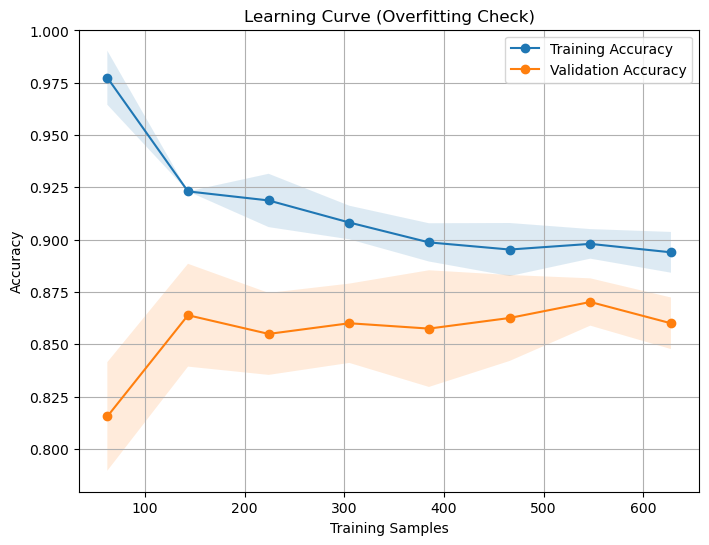

In [41]:
# ============================================================
# 10) LEARNING CURVE (OVERFITTING CHECK)
# ============================================================
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    final_pipe,
    X_train[selected_features],
    y_train,
    cv=5,
    scoring="accuracy",
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1
)

train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)

val_mean = np.mean(val_scores, axis=1)
val_std  = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, marker="o", label="Training Accuracy")
plt.plot(train_sizes, val_mean, marker="o", label="Validation Accuracy")

plt.fill_between(
    train_sizes,
    train_mean - train_std,
    train_mean + train_std,
    alpha=0.15
)

plt.fill_between(
    train_sizes,
    val_mean - val_std,
    val_mean + val_std,
    alpha=0.15
)

plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.title("Learning Curve (Overfitting Check)")
plt.legend()
plt.grid(True)
plt.show()
